# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [16]:
# Import warnings
import warnings
warnings.filterwarnings(action="ignore")

In [17]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [21]:
# Try loading one file
df = pd.read_parquet('../trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [27]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [28]:
# from google.colab import drive
# drive.mount('/content/drive')

In [29]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('../trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_month = pd.read_parquet(file_path)
        df_month['day'] = pd.DatetimeIndex(df_month['tpep_pickup_datetime']).day
        df_month['hour'] = pd.DatetimeIndex(df_month['tpep_pickup_datetime']).hour
 
        unique_days = df_month['day'].unique()
        unique_hours = df_month['hour'].unique()

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        # Loop through dates and then loop through every hour of each date
        for iday in unique_days:
            # Iterate through each hour of the selected date
            for ihour in unique_hours:
                # Sample 5% of the hourly data randomly
                # TODO: change it back to 0.05
                hour_data = df_month[(df_month['day'] == iday) & (df_month['hour'] == ihour)]
                sample = hour_data.sample(frac = 0.2, random_state = 42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample], ignore_index=True) # adding data for this hour to the DF

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)
        df_month = pd.DataFrame()

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [31]:
# Store the df in csv/parquet
os.chdir('../EDA_Optimising_NYC_Taxis_Girish_Chidambaran/')
df.to_parquet('ny_taxi_sample.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [34]:
# Load the new data file
df = pd.read_parquet('ny_taxi_sample.parquet')

In [35]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:13:39   2023-12-01 00:21:26              6.0   
1         2  2023-12-01 00:04:20   2023-12-01 00:17:04              1.0   
2         2  2023-12-01 00:56:00   2023-12-01 01:03:44              2.0   
3         2  2023-12-01 00:17:02   2023-12-01 00:23:44              1.0   
4         2  2023-12-01 00:02:30   2023-12-01 00:21:31              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.32         1.0                  N           158           246   
1           2.07         1.0                  N           142           164   
2           0.92         1.0                  N           186           170   
3           0.75         1.0                  N           186           230   
4           3.60         1.0                  N            79            50   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        2.86           0.0   
1             2  ...      0.5        0.00           0.0   
2             1  ...      0.5        0.00           0.0   
3             1  ...      0.5        2.58           0.0   
4             1  ...      0.5        5.24           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         17.16                   2.5          0.0   
1                    1.0         18.50                   2.5          0.0   
2                    1.0         13.60                   2.5          0.0   
3                    1.0         15.48                   2.5          0.0   
4                    1.0         31.44                   2.5          0.0   

   day  hour  airport_fee  
0    1     0          NaN  
1    1     0          NaN  
2    1     0          NaN  
3    1     0          NaN  
4    1     0          NaN  

[5 rows x 22 columns]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7585700 entries, 0 to 7585699
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [39]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [41]:
# Combine the two airport fee columns
df.Airport_fee.fillna(0, inplace=True)
df.airport_fee.fillna(0, inplace=True)
# The non-zero column values of Airport_fee and the airport_fee are non-overlapping. 
# So I could store the vector addition in one of the columns and delete the other
df.Airport_fee = df.Airport_fee + df.airport_fee
df.drop(columns=['airport_fee'], inplace=True)

**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [43]:
# check where values of fare amount are negative

# the store_and_fwd_flag has only two values Y and N, so converting the value to make column data type Boolean
df.store_and_fwd_flag = df.store_and_fwd_flag.map(lambda x: False if x == 'N' else True if x == 'Y' else x)

# to be able to identify rows in which any cell that has negative value, we have to drop non-numeric data types
df_without_dates = df.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
df_negative_rows = df_without_dates.loc[(df_without_dates < 0).any(axis=1)]


Did you notice something different in the `RatecodeID` column for above records?

In [45]:
# Analyse RatecodeID for the negative fare amounts
df_negative_rows['RatecodeID'].value_counts()
# my conclusion is that there is no reason to think that there is a correlation between negative values and RatecodeID


RatecodeID
1.0    224
2.0    110
5.0     19
3.0      9
4.0      3
Name: count, dtype: int64

In [46]:
# after doing df_nagative_rows.describe(), I looked closer at payment type and store_and_fwd_flag
df_negative_rows['payment_type'].value_counts()
# negative values occur more with cash payments

payment_type
2    349
4      9
1      6
3      1
Name: count, dtype: int64

In [47]:
df_negative_rows['store_and_fwd_flag'].value_counts()
# negative values occur more with store_and_fwd_flag = False
# But above two observations have not been useful yet

store_and_fwd_flag
False    365
Name: count, dtype: int64

In [48]:
# Find which columns have negative values
negative_cols = df_without_dates.columns[(df_without_dates < 0).any()].tolist()
print(negative_cols)

['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [49]:
# fix these negative values
df['extra'] = df['extra'].abs()
df['mta_tax'] = df['mta_tax'].abs()
df['improvement_surcharge'] = df['improvement_surcharge'].abs()
df['total_amount'] = df['total_amount'].abs()
df['congestion_surcharge'] = df['congestion_surcharge'].abs()
df['Airport_fee'] = df['Airport_fee'].abs()

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [52]:
# Find the proportion of missing values in each column
df.isna().mean()
# close 3.5 % of data in passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge are missing

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034529
trip_distance            0.000000
RatecodeID               0.034529
store_and_fwd_flag       0.034529
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034529
Airport_fee              0.000000
day                      0.000000
hour                     0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [54]:
# Display the rows with null values
df.loc[df.isna().any(axis=1)]
# Impute NaN values in 'passenger_count'
df['passenger_count'] = df.passenger_count.fillna(1)

Did you find zeroes in passenger_count? Handle these.

In [56]:
df['passenger_count'].replace(0, 1, inplace=True)
# it makes sense to replace 0 as 1

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [58]:
# Fix missing values in 'RatecodeID'
# Even thought data description did not describe value 99, it looks like it is for undefined
# So impuned the missing values in RatecodeID as 99.
df.RatecodeID.fillna(99, inplace=True)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [60]:
# handle null values in congestion_surcharge
# zero seems to be a resonable assumption
df.congestion_surcharge.fillna(0, inplace=True)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [62]:
# Handle any remaining missing values
df[df.isna().any(axis=1)]
# need to change store_and_forward and payment_type
df.store_and_fwd_flag.fillna(False, inplace=True)
# payment_type = 5 is for Unknown, So the value of 0 is imputed to 5
df.payment_type.replace(0, 5, inplace=True)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [65]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
# This analysis makes sense only for numerical data type. Hence, running only for them.
df.select_dtypes(include=np.number).describe()

VendorID  passenger_count  trip_distance    RatecodeID  \
count  7.585700e+06     7.585700e+06   7.585700e+06  7.585700e+06   
mean   1.733465e+00     1.372529e+00   3.950751e+00  4.997033e+00   
std    4.472431e-01     8.646745e-01   1.975601e+02  1.920416e+01   
min    1.000000e+00     1.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.050000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.800000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.400000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   2.968814e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  7.585700e+06  7.585700e+06  7.585700e+06  7.585700e+06  7.585700e+06   
mean   1.652695e+02  1.640069e+02  1.335705e+00  1.989594e+01  1.588719e+00   
std    6.400275e+01  6.982352e+01  8.306500e-01  5.553973e+01  4.066121e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00   
75%    2.340000e+02  2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  5.000000e+00  1.431635e+05  1.000250e+04   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  7.585700e+06  7.585700e+06  7.585700e+06           7.585700e+06   
mean   4.952932e-01  3.553524e+00  5.986453e-01           9.990793e-01   
std    4.855504e-02  4.079412e+00  2.189976e+00           2.796123e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00           0.000000e+00   
25%    5.000000e-01  1.000000e+00  0.000000e+00           1.000000e+00   
50%    5.000000e-01  2.850000e+00  0.000000e+00           1.000000e+00   
75%    5.000000e-01  4.450000e+00  0.000000e+00           1.000000e+00   
max    4.000000e+00  4.805000e+02  1.430000e+02           1.000000e+00   

       total_amount  congestion_surcharge   Airport_fee           day  \
count  7.585700e+06          7.585700e+06  7.585700e+06  7.585700e+06   
mean   2.897012e+01          2.228353e+00  1.384953e-01  1.551773e+01   
std    5.776205e+01          7.780267e-01  4.582857e-01  8.695667e+00   
min    0.000000e+00          0.000000e+00  0.000000e+00  1.000000e+00   
25%    1.596000e+01          2.500000e+00  0.000000e+00  8.000000e+00   
50%    2.100000e+01          2.500000e+00  0.000000e+00  1.500000e+01   
75%    3.100000e+01          2.500000e+00  0.000000e+00  2.300000e+01   
max    1.431675e+05          2.750000e+00  1.750000e+00  3.100000e+01   

               hour  
count  7.585700e+06  
mean   1.426502e+01  
std    5.807438e+00  
min    0.000000e+00  
25%    1.100000e+01  
50%    1.500000e+01  
75%    1.900000e+01  
max    2.300000e+01

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [69]:
# remove passenger_count > 6
df = df[df.passenger_count<=6]

In [70]:
# Continue with outlier handling
df[df.trip_distance > 250].sort_values("trip_distance")
df = df[df.trip_distance<250]
df = df[df.total_amount<10000]

In [71]:
# Do any columns need standardising?
df.select_dtypes(include=np.number).describe()
df['standardised_fare_amount'] = (df.fare_amount - df.fare_amount.mean())/(df['fare_amount'].std())
df['standardised_total_amount'] = (df.total_amount - df.total_amount.mean())/(df.total_amount.std())
df.standardised_fare_amount.describe()
# this is the closest I could to to standardisation. The mean is not zero. Not sure of the utility in this case.

count    7.585430e+06
mean    -2.556872e-16
std      1.000000e+00
min     -1.085714e+00
25%     -5.776419e-01
50%     -3.481903e-01
75%      1.107131e-01
max      7.403240e+01
Name: standardised_fare_amount, dtype: float64

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [73]:
lst = df.columns.tolist()
# below output give some indication if the data is categorical or numerical 
df.nunique().sort_values()

store_and_fwd_flag                 2
VendorID                           3
improvement_surcharge              3
Airport_fee                        4
congestion_surcharge               5
payment_type                       5
passenger_count                    6
RatecodeID                         7
mta_tax                           10
hour                              24
day                               31
extra                             93
DOLocationID                     261
PULocationID                     261
tolls_amount                    1377
tip_amount                      5169
trip_distance                   5417
fare_amount                    10006
standardised_fare_amount       10006
total_amount                   20232
standardised_total_amount      20232
tpep_dropoff_datetime        6497142
tpep_pickup_datetime         6498756
dtype: int64

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

Since most of the columns were numeric, tried to understand the value_counts of unique values in the columns. This tell which columsn have enumerated or dimensional or categorical data and which ones have measured or numeric data.
    Categorical:
        VendorID:
        passenger_count:
        RatecodeID:
        PULocationID:
        DOLocationID:
        payment_type:
        pickup_hour:
    Numerical:
        tpep_pickup_datetime:
        tpep_dropoff_datetime:
        trip_distance:
        trip_duration:
        fare_amount
        extra
        mta_tax
        tip_amount
        tolls_amount
        improvement_surcharge
        total_amount
        congestion_surcharge
        airport_fee

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

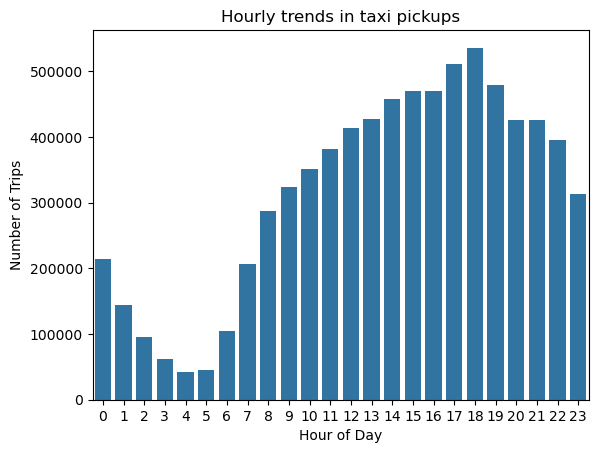

In [79]:
# Find and show the hourly trends in taxi pickups
ax = sns.barplot(df.hour.value_counts().sort_index())
ax.set(title="Hourly trends in taxi pickups", xlabel="Hour of Day", ylabel="Number of Trips")
plt.show()
# peak hours are evening ours

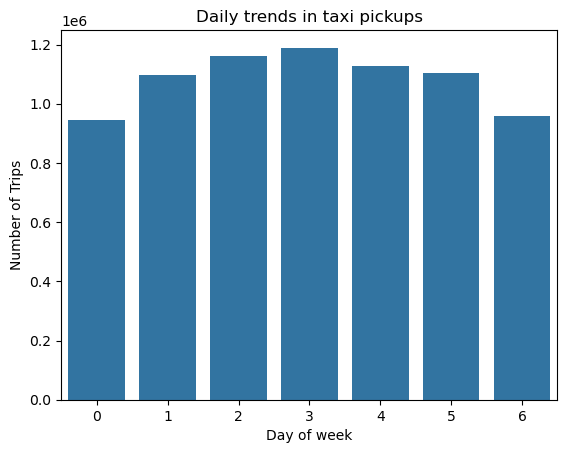

In [80]:
# Find and show the daily trends in taxi pickups (days of the week)
df['day_of_week'] = df['tpep_pickup_datetime'].dt.weekday
ax = sns.barplot(df.day_of_week.value_counts().sort_index())
ax.set(title="Daily trends in taxi pickups", xlabel="Day of week", ylabel="Number of Trips")
plt.show()
# 0 is Monday and 6 is Sunday
# Thu has the highest traffic

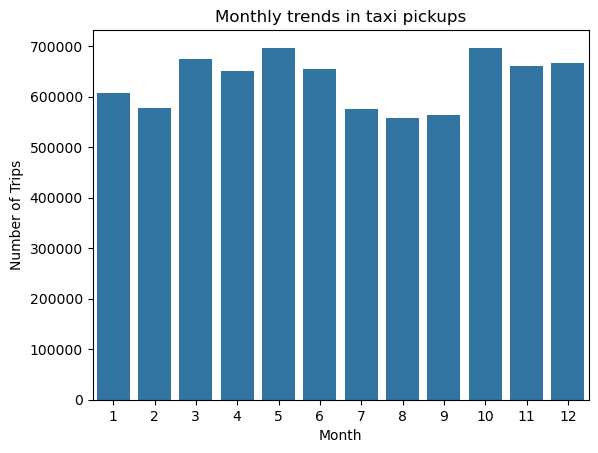

In [81]:
# Show the monthly trends in pickups
df['month'] = pd.DatetimeIndex(df.tpep_pickup_datetime).month
ax = sns.barplot(df.month.value_counts().sort_index())
ax.set(title="Monthly trends in taxi pickups", xlabel="Month", ylabel="Number of Trips")
plt.show()
# summer and winter months are lean periods. In the US, Summer is in July, Aug, Sep.

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [84]:
# Analyse the above parameters
print(df[df['fare_amount'] <= 0].any(axis=1).sum())
print(df[df['tip_amount'] <= 0].any(axis=1).sum())
print(df[df['total_amount'] <= 0].any(axis=1).sum())
print(df[df['trip_distance'] <= 0].any(axis=1).sum())

# It makes sense, to create a new dataframe without zero values.

2603
1738856
1232
148643


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [87]:
# Create a df with non zero entries for the selected parameters.
df1 = df[df.total_amount!=0]
df1 = df1[df1.fare_amount!=0]
df1 = df1[df1.trip_distance != 0]


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

<Axes: xlabel='month', ylabel='total_amount'>

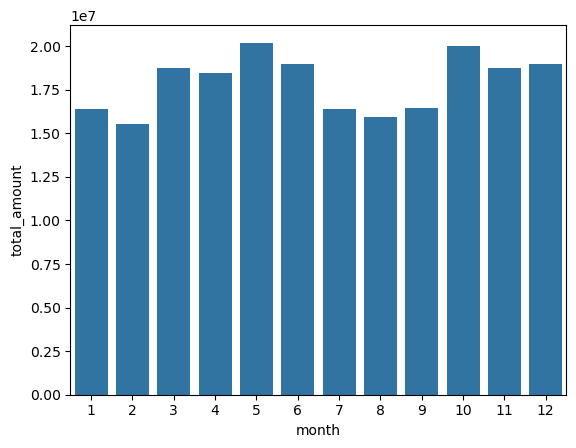

In [89]:
# Group data by month and analyse monthly revenue
sns.barplot(df1.groupby(by=['month'])['total_amount'].sum())


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [91]:
# Calculate proportion of each quarter
df1['quarter'] = df1.tpep_pickup_datetime.dt.quarter
df1.groupby(by=['quarter'])['total_amount'].sum()/df1.total_amount.sum()

quarter
1    0.235865
2    0.268198
3    0.227108
4    0.268829
Name: total_amount, dtype: float64

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

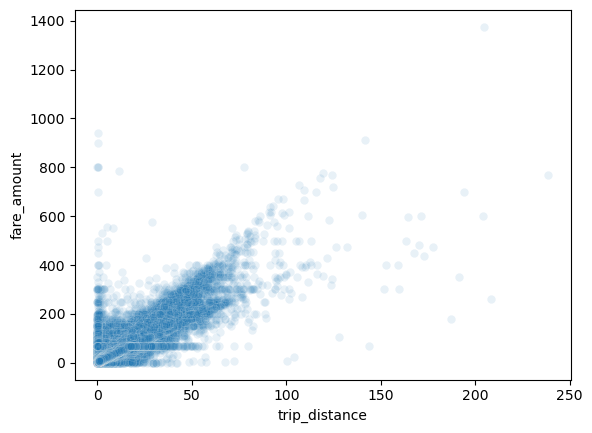

In [93]:
# Show how trip fare is affected by distance
sns.scatterplot(x=df1.trip_distance, y=df1.fare_amount, alpha=0.1)


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

<Axes: xlabel='trip_duration', ylabel='fare_amount'>

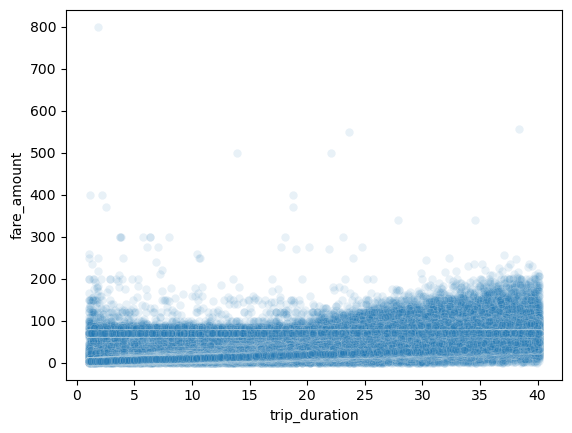

In [95]:
# Show relationship between fare and trip duration
df1['trip_duration'] = (df1.tpep_dropoff_datetime - df1.tpep_pickup_datetime).dt.seconds/60
df1 = df1[df1.trip_duration>1]
df1 = df1[df1.trip_duration <200]

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df1['trip_duration'].quantile(0.25)
Q3 = df1['trip_duration'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df1 = df1[(df1['trip_duration'] >= lower_bound) & (df1['trip_duration'] <= upper_bound)]


sns.scatterplot(x=(df1.trip_duration), y=df1.fare_amount, alpha=0.1)


<Axes: xlabel='passenger_count', ylabel='fare_amount'>

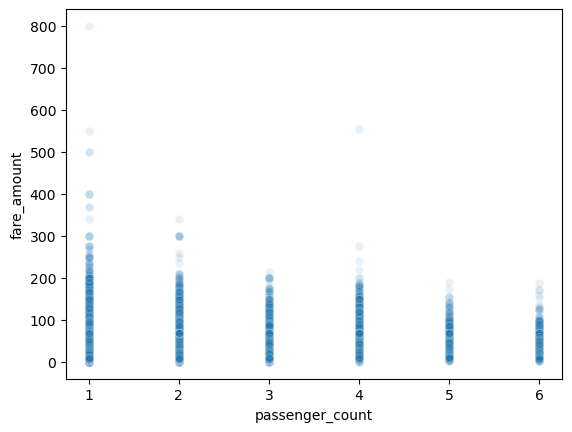

In [96]:
# Show relationship between fare and number of passengers
sns.scatterplot(x=df1.passenger_count, y=df1.fare_amount, alpha=0.1)



<Axes: xlabel='trip_distance', ylabel='tip_amount'>

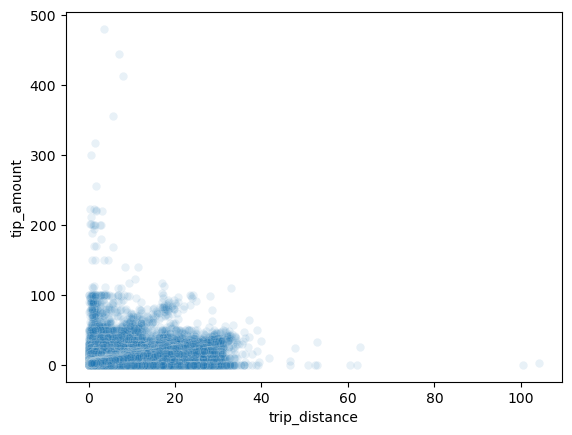

In [97]:
# Show relationship between tip and trip distance
sns.scatterplot(x=df1.trip_distance, y=df1.tip_amount, alpha=0.1)



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

<Axes: xlabel='payment_type', ylabel='Count'>

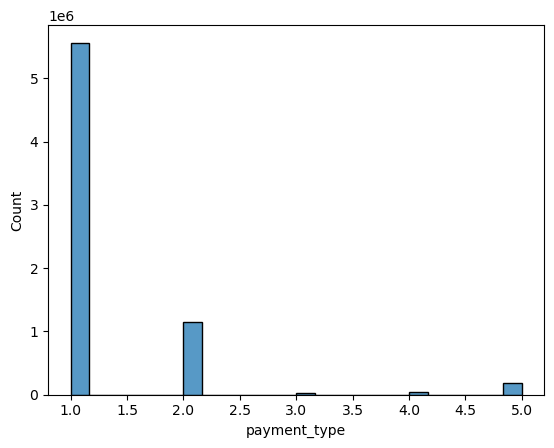

In [99]:
# Analyse the distribution of different payment types (payment_type).
sns.histplot(data=df1.payment_type)



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [104]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [106]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file("../taxi_zones/taxi_zones.shp")# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

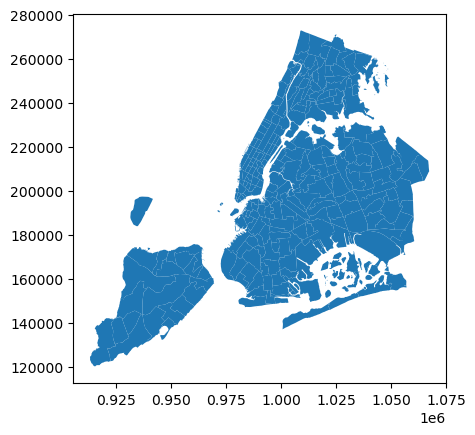

In [108]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [111]:
# Merge zones and trip records using locationID and PULocationID
zones1 = zones.merge(df1, how='inner',  left_on=zones.LocationID, right_on=df1.PULocationID)


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [113]:
# Group data by location and calculate the number of trips
zones_temp = zones1.groupby(by='LocationID')['total_amount'].count().reset_index(name='trip_count')
zones_temp

LocationID  trip_count
0             1          66
1             2           2
2             3          84
3             4        8463
4             5           7
..          ...         ...
250         259         114
251         260        1208
252         261       35555
253         262       97957
254         263      140540

[255 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [115]:
# Merge trip counts back to the zones GeoDataFrame
zones['trip_count'] = zones['LocationID'].map(zones_temp.set_index('LocationID')['trip_count'])
zones['trip_count'].fillna(0, inplace=True)


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

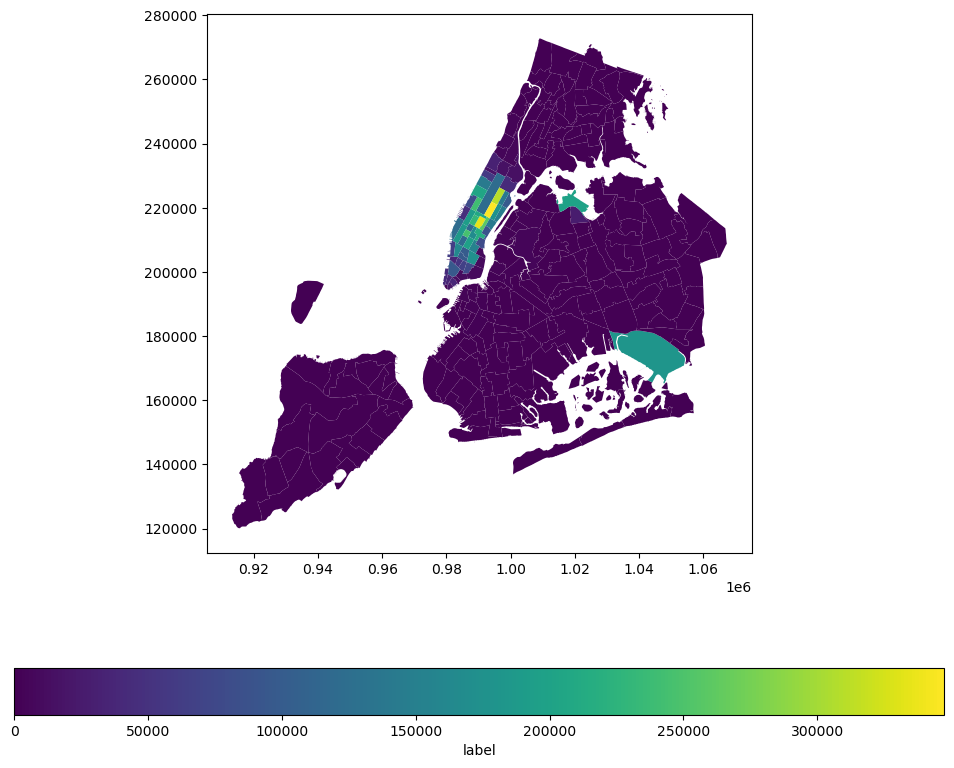

 LocationID                                          zone
         84             Eltingville/Annadale/Prince's Bay
         99                               Freshkills Park
        103 Governor's Island/Ellis Island/Liberty Island
        103 Governor's Island/Ellis Island/Liberty Island
        103 Governor's Island/Ellis Island/Liberty Island
        110                              Great Kills Park
        176                                       Oakwood


In [119]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column = 'trip_count',
    ax = ax,
    legend = True,
    legend_kwds = {'label': "label", 'orientation': "horizontal"})
plt.show()

print(zones[zones['trip_count']==0][['LocationID', 'zone']].to_string(index=False))


In [120]:
# can you try displaying the zones DF sorted by the number of trips?
zones[['zone', 'trip_count']].sort_values(by='trip_count', ascending=False).head(20)


zone  trip_count
236         Upper East Side South    347538.0
160                Midtown Center    334204.0
235         Upper East Side North    310700.0
161                  Midtown East    258192.0
185  Penn Station/Madison Sq West    245603.0
141           Lincoln Square East    241629.0
229     Times Sq/Theatre District    231819.0
169                   Murray Hill    215037.0
162                 Midtown North    209012.0
238         Upper West Side South    204042.0
137             LaGuardia Airport    199890.0
233                      Union Sq    196504.0
47                   Clinton East    191532.0
67                   East Chelsea    187216.0
131                   JFK Airport    181699.0
140               Lenox Hill West    175318.0
78                   East Village    173574.0
163                 Midtown South    166807.0
248                  West Village    162816.0
106                      Gramercy    154161.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [129]:
# Find routes which have the slowest speeds at different times of the day
def slow_routes(group):
    # route_speed = group.groupby(by=['PULocationID', 'DOLocationID']).apply(lambda x: x['trip_distance'].sum()/x['trip_duration'].sum()).reset_index(name='speed')
    route_speed = group.groupby(by=['PULocationID', 'DOLocationID'], as_index=False ).agg(
        trip_distance_mean = ('trip_distance', 'mean'),
        trip_duration_mean = ('trip_duration', 'mean')
    )
    route_speed['speed'] = route_speed['trip_distance_mean'] / route_speed['trip_duration_mean']
    slow_route = route_speed.loc[route_speed['speed'].idxmin()]
    return slow_route
df1.groupby(by=['hour']).apply(slow_routes)


PULocationID  DOLocationID  trip_distance_mean  trip_duration_mean  \
hour                                                                       
0            191.0          19.0                0.43           22.050000   
1            247.0          56.0                0.10           25.433333   
2             43.0         162.0                0.34           15.050000   
3            153.0         153.0                0.04           15.433333   
4             76.0         137.0                0.10           39.216667   
5            233.0         264.0                0.02            3.566667   
6            205.0         165.0                0.20           39.833333   
7            128.0         128.0                0.02           10.400000   
8             14.0         124.0                0.10           29.700000   
9             78.0          47.0                0.10           33.016667   
10            72.0         130.0                0.10           37.350000   
11           109.0         109.0                0.01           16.883333   
12            90.0          83.0                0.01           23.250000   
13            95.0         260.0                0.10           37.850000   
14            61.0         145.0                0.01           31.600000   
15            93.0         226.0                0.02           10.483333   
16           194.0         194.0                0.01           12.266667   
17             1.0         264.0                0.01           11.833333   
18           254.0         239.0                0.20           32.433333   
19            42.0          90.0                0.10           22.650000   
20            68.0          32.0                0.10           39.750000   
21           247.0          68.0                0.10           30.883333   
22           237.0           8.0                0.10           23.833333   
23           254.0         254.0                0.17           14.283333   

         speed  
hour            
0     0.019501  
1     0.003932  
2     0.022591  
3     0.002592  
4     0.002550  
5     0.005607  
6     0.005021  
7     0.001923  
8     0.003367  
9     0.003029  
10    0.002677  
11    0.000592  
12    0.000430  
13    0.002642  
14    0.000316  
15    0.001908  
16    0.000815  
17    0.000845  
18    0.006166  
19    0.004415  
20    0.002516  
21    0.003238  
22    0.004196  
23    0.011902

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest hour is 18


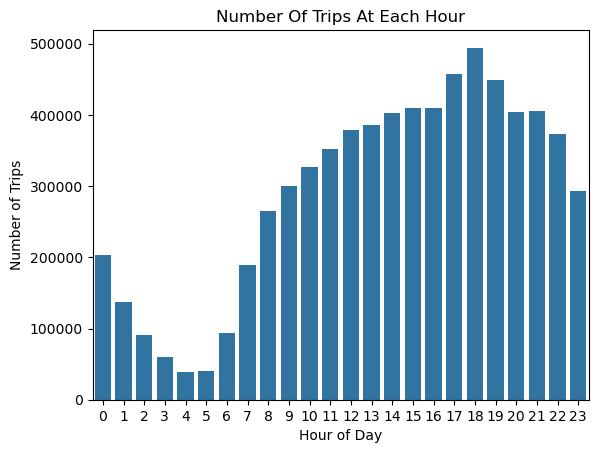

In [132]:
# Visualise the number of trips per hour and find the busiest hour
ax = sns.barplot(df1.groupby(by='hour')['total_amount'].count())
ax.set(title="Number Of Trips At Each Hour", xlabel="Hour of Day", ylabel="Number of Trips")

print(f'Busiest hour is {df1.groupby(by='hour')['total_amount'].count().idxmax()}')

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [135]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

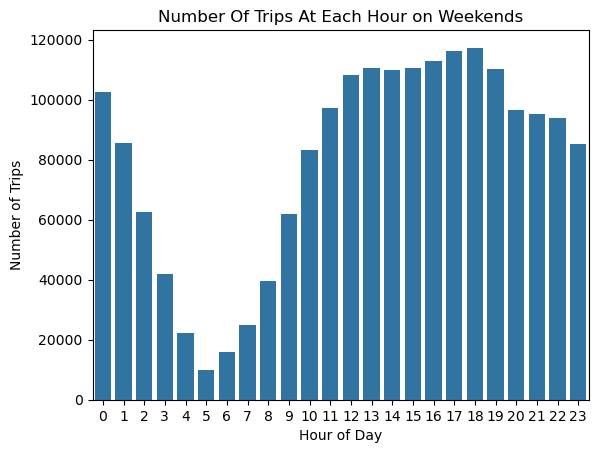

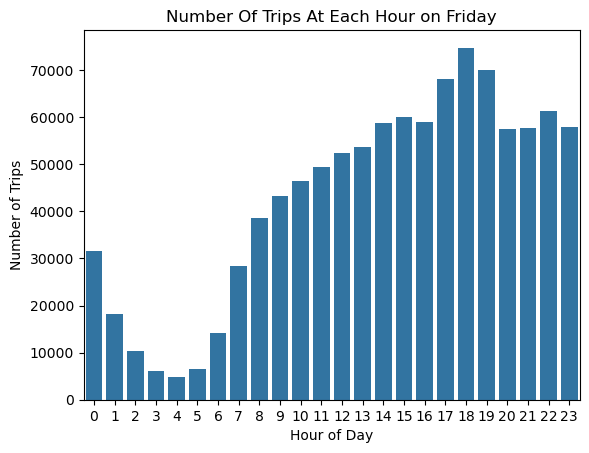

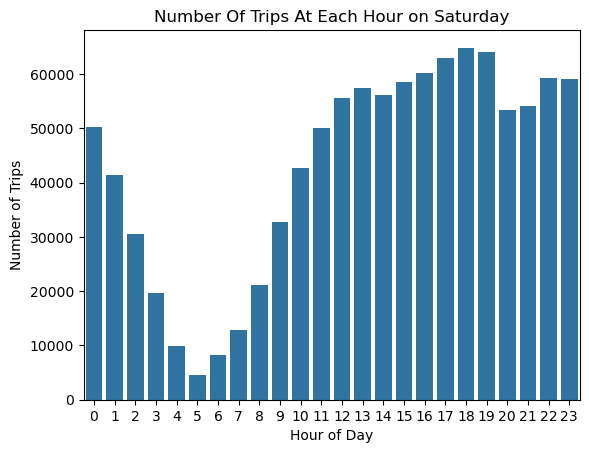

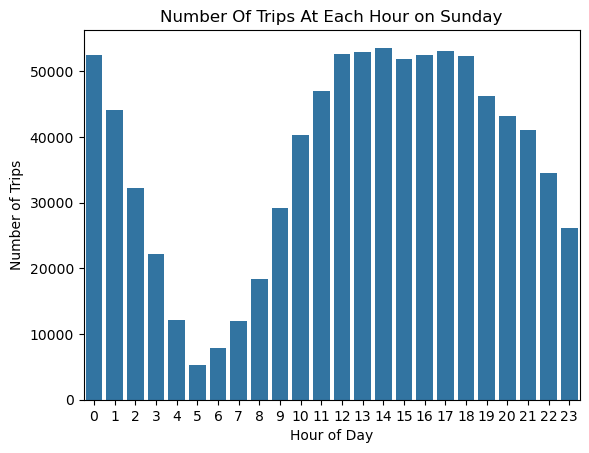

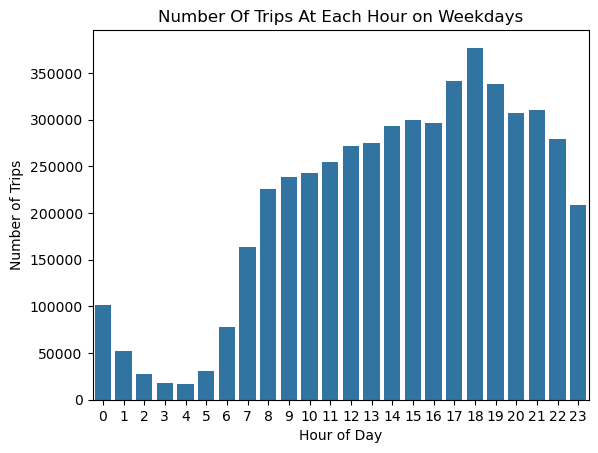

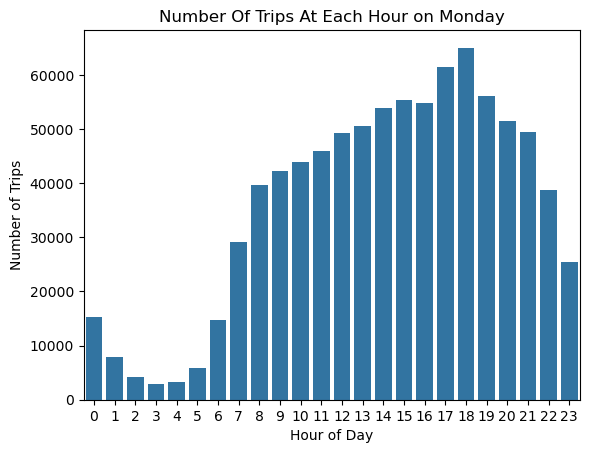

In [137]:
# Compare traffic trends for the week days and weekends
ax = sns.barplot(df1.query('day_of_week == 5 | day_of_week == 6').groupby(by='hour')['total_amount'].count())
ax.set(title="Number Of Trips At Each Hour on Weekends", xlabel="Hour of Day", ylabel="Number of Trips")
plt.show()
ax = sns.barplot(df1.query('day_of_week == 4').groupby(by='hour')['total_amount'].count())
ax.set(title="Number Of Trips At Each Hour on Friday", xlabel="Hour of Day", ylabel="Number of Trips")
plt.show()
ax = sns.barplot(df1.query('day_of_week == 5').groupby(by='hour')['total_amount'].count())
ax.set(title="Number Of Trips At Each Hour on Saturday", xlabel="Hour of Day", ylabel="Number of Trips")
plt.show()
ax = sns.barplot(df1.query('day_of_week == 6').groupby(by='hour')['total_amount'].count())
ax.set(title="Number Of Trips At Each Hour on Sunday", xlabel="Hour of Day", ylabel="Number of Trips")
plt.show()
ax = sns.barplot(df1.query('day_of_week != 5 & day_of_week != 6').groupby(by='hour')['total_amount'].count())
ax.set(title="Number Of Trips At Each Hour on Weekdays", xlabel="Hour of Day", ylabel="Number of Trips")
plt.show()
ax = sns.barplot(df1.query('day_of_week == 0').groupby(by='hour')['total_amount'].count())
ax.set(title="Number Of Trips At Each Hour on Monday", xlabel="Hour of Day", ylabel="Number of Trips")
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Top 10 pickup zones are:
           Midtown Center
    Upper East Side South
    Upper East Side North
             Midtown East
      Lincoln Square East
              JFK Airport
            Midtown North
Times Sq/Theatre District
              Murray Hill
                 Union Sq
Top 10 dropoff zones are:
    Upper East Side South
    Upper East Side North
           Midtown Center
      Lincoln Square East
Times Sq/Theatre District
    Upper West Side South
          Lenox Hill West
             Midtown East
              Murray Hill
             Clinton East


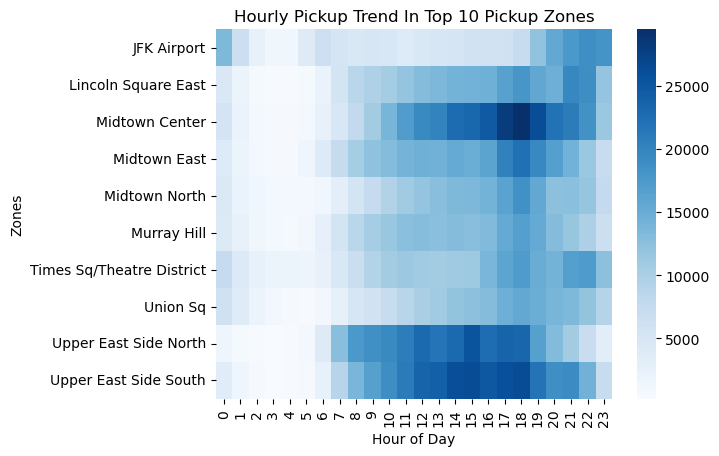

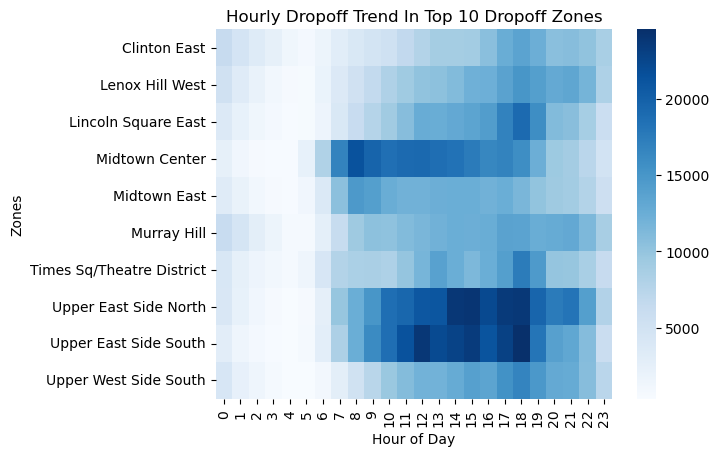

In [140]:
# Find top 10 pickup and dropoff zones
df1pu = df1[['hour', 'PULocationID']]
df1pu = df1pu.merge(zones[['LocationID', 'zone']], how='inner', left_on='PULocationID', right_on='LocationID')

trip_counts = df1pu.groupby(['hour', 'zone']).size().reset_index(name='trip_count')
sorted_trips = trip_counts.sort_values(by=['trip_count', 'zone'], ascending=[False, True])
unique_locations = sorted_trips.drop_duplicates(subset='zone')
df1pu_top10 = unique_locations.head(10)

df1do = df1[['hour', 'DOLocationID']]
df1do = df1do.merge(zones[['LocationID', 'zone']], how='inner', left_on='DOLocationID', right_on='LocationID')

trip_counts = df1do.groupby(['hour', 'zone']).size().reset_index(name='trip_count')
sorted_trips = trip_counts.sort_values(by=['trip_count', 'zone'], ascending=[False, True])
unique_locations = sorted_trips.drop_duplicates(subset='zone')
df1do_top10 = unique_locations.head(10)
# print zone names
print('Top 10 pickup zones are:')
print(df1pu_top10['zone'].to_string(index=False))
print('Top 10 dropoff zones are:')
print(df1do_top10['zone'].to_string(index=False))
# show pick up and drop off trends of the zones in a heatmap
df1pu_pivot = df1pu[df1pu['zone'].isin(df1pu_top10['zone'])].pivot_table( index='zone', columns='hour', aggfunc='size', fill_value=0)
ax = sns.heatmap(df1pu_pivot, cmap='Blues')
ax.set(title="Hourly Pickup Trend In Top 10 Pickup Zones", xlabel="Hour of Day", ylabel="Zones")

plt.show()
df1do_pivot = df1do[df1do['zone'].isin(df1do_top10['zone'])].pivot_table( index='zone', columns='hour', aggfunc='size', fill_value=0)
ax = sns.heatmap(df1do_pivot, cmap='Blues')
ax.set(title="Hourly Dropoff Trend In Top 10 Dropoff Zones", xlabel="Hour of Day", ylabel="Zones")
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [142]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
zones2 = None
zones2 = zones.merge(df1, how='left', left_on='LocationID', right_on='PULocationID', suffixes=('_z', '_pu'))
zones2 = zones.merge(df1, how='left', left_on='LocationID', right_on='DOLocationID', suffixes=('_z', '_do'))

zones['pu_by_do'] = zones2.groupby(by='PULocationID').size() / zones2.groupby(by='DOLocationID').size()

print('Top 10 pickup/dropoff ratios: ')
print(zones.nlargest(10, columns='pu_by_do')[['zone', 'pu_by_do']].to_string(index=False))

print('Bottom 10 pickup/dropoff ratios: ')
print(zones.nsmallest(10, columns='pu_by_do')[['zone', 'pu_by_do']].to_string(index=False))

Top 10 pickup/dropoff ratios: 
                         zone  pu_by_do
       East Flatbush/Farragut  7.969369
                   Kensington  6.070582
                    Laurelton  2.488014
                Port Richmond  1.555483
          Grymes Hill/Clifton  1.387466
       Charleston/Tottenville  1.375625
Westchester Village/Unionport  1.344454
                Midtown North  1.260225
                    Glen Oaks  1.229005
                Midtown South  1.205377
Bottom 10 pickup/dropoff ratios: 
                       zone  pu_by_do
                Jamaica Bay  0.003281
  West Chelsea/Hudson Yards  0.029412
    Briarwood/Jamaica Hills  0.031250
                 Highbridge  0.031250
Downtown Brooklyn/MetroTech  0.037711
                 Whitestone  0.042553
                Fort Greene  0.042857
                  Woodhaven  0.044144
              Rockaway Park  0.044579
              Willets Point  0.044908


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [144]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours = [23, 0, 1, 2, 3, 4]
day_hours = [x for x in range(0, 24) if x not in night_hours]
top10_pickup_zones = zones2[zones2['hour'].isin(night_hours)].groupby(by=['PULocationID']).size().reset_index(name='trip_count').nlargest(10, columns='trip_count')
top10_pickup_zones = top10_pickup_zones.merge(zones[['LocationID', 'zone']], how='inner', left_on='PULocationID', right_on='LocationID')

print("Top 10 pickup zones in night hours are:")
print(top10_pickup_zones[['zone', 'trip_count']].to_string(index=False))

top10_dropoff_zones = zones2[zones2['hour'].isin(night_hours)].groupby(by=['DOLocationID']).size().reset_index(name='trip_count').nlargest(10, columns='trip_count')
top10_dropoff_zones = top10_dropoff_zones.merge(zones[['LocationID', 'zone']], how='inner', left_on='DOLocationID', right_on='LocationID')

print("Top 10 dropoff zones in night hours are:")
print(top10_dropoff_zones[['zone', 'trip_count']].to_string(index=False))

Top 10 pickup zones in night hours are:
                        zone  trip_count
                East Village       62164
                West Village       50239
                 JFK Airport       41612
             Lower East Side       38986
                Clinton East       38712
     Greenwich Village South       35067
   Times Sq/Theatre District       30450
Penn Station/Madison Sq West       24563
               Midtown South       24018
                East Chelsea       23309
Top 10 dropoff zones in night hours are:
                         zone  trip_count
                 East Village       33043
                 Clinton East       26853
                  Murray Hill       24764
                     Gramercy       22357
                 East Chelsea       21817
              Lenox Hill West       20749
               Yorkville West       20197
                 West Village       19607
Sutton Place/Turtle Bay North       17281
              Lower East Side       17227


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [146]:
# Filter for night hours (11 PM to 5 AM)
night_revenue = df1[df1['hour'].isin(night_hours)]['total_amount'].sum()
night_trips = df1[df1['hour'].isin(night_hours)]['total_amount'].count()
print(f'Revenue share in night hours is {night_revenue} from {night_trips} trips')

day_revenue = df1[df1['hour'].isin(day_hours)]['total_amount'].sum()
day_trips = df1[df1['hour'].isin(day_hours)]['total_amount'].count()
print(f'Revenue share in night hours is {day_revenue} from {day_trips} trips')


Revenue share in night hours is 22771274.57 from 823679 trips
Revenue share in night hours is 153126476.9599999 from 6138756 trips


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

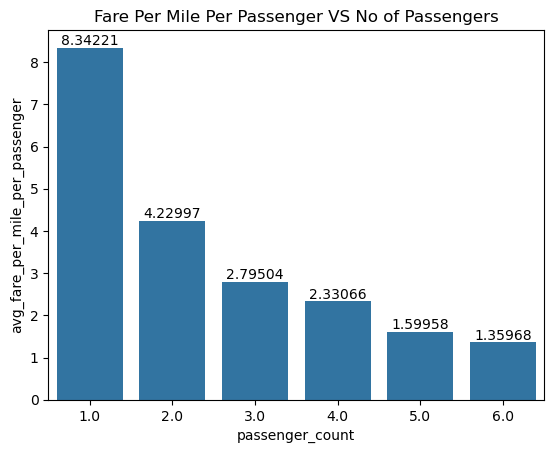

In [149]:
# Analyse the fare per mile per passenger for different passenger counts
df1['fare_per_mile'] = df1['fare_amount']/df1['trip_distance']
df1['fare_per_mile_per_passenger'] = df1['fare_per_mile']/df1['passenger_count']
df1_avg_fare_per_mile_per_passenger = df1.groupby(by='passenger_count')['fare_per_mile_per_passenger'].mean().reset_index(name='avg_fare_per_mile_per_passenger')
ax = sns.barplot(data=df1_avg_fare_per_mile_per_passenger, x='passenger_count', y='avg_fare_per_mile_per_passenger')
ax.set(title="Fare Per Mile Per Passenger VS No of Passengers")
ax.bar_label(ax.containers[0])
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

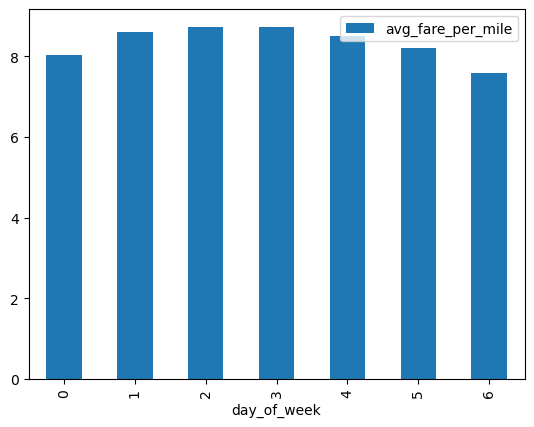

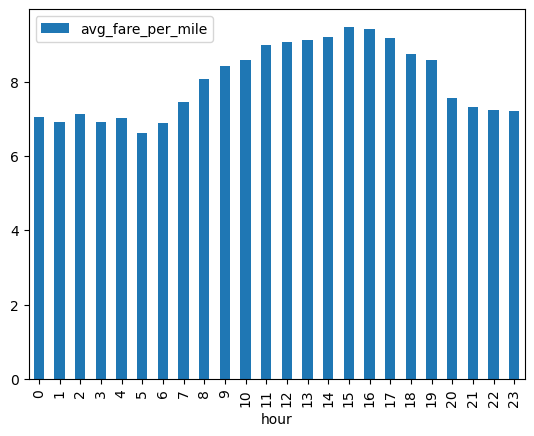

In [151]:
# Compare the average fare per mile for different days and for different times of the day
df1.groupby(by='day_of_week')['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile').plot.bar(x='day_of_week', y='avg_fare_per_mile')
plt.show()
df1.groupby(by='hour')['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile').plot.bar(x='hour', y='avg_fare_per_mile')
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

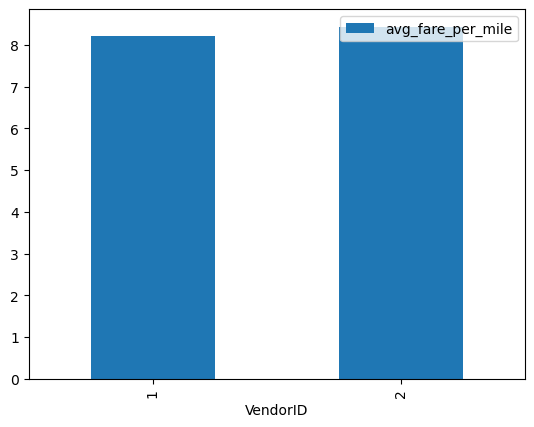

In [153]:
# Compare fare per mile for different vendors
df1.groupby(by='VendorID')['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile').plot.bar(x='VendorID', y='avg_fare_per_mile')
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


<Axes: xlabel='trip_distance_range'>

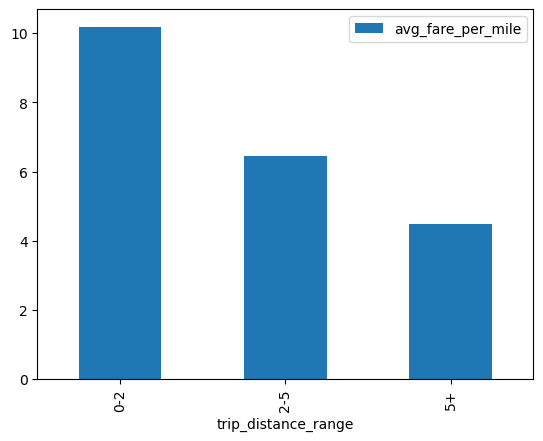

In [155]:
# Defining distance tiers
bins = [0, 2, 5, df1['trip_distance'].max()]
labels = ['0-2', '2-5', '5+']
df1['trip_distance_range'] = pd.cut(df1['trip_distance'], bins=bins, labels=labels)
df1.groupby(by='trip_distance_range')['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile').plot.bar(x='trip_distance_range', y='avg_fare_per_mile')


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

<Axes: xlabel='hour'>

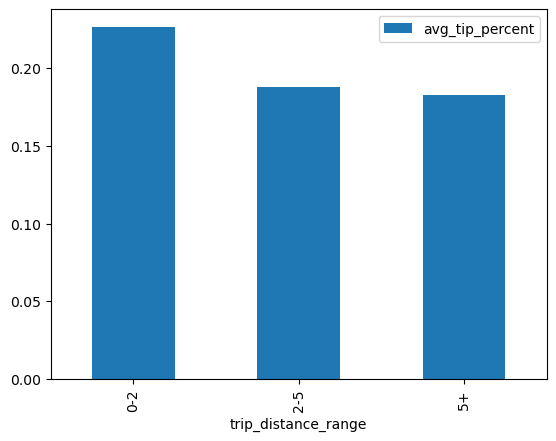

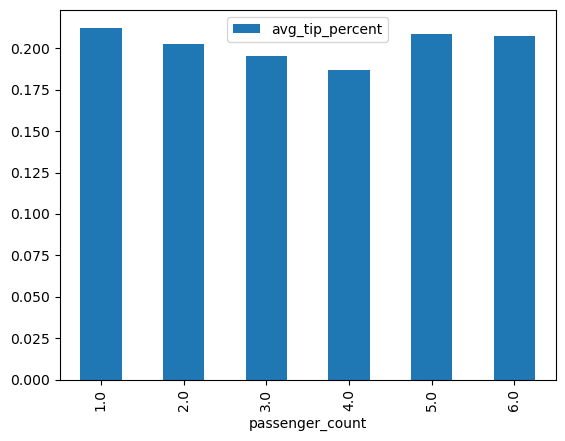

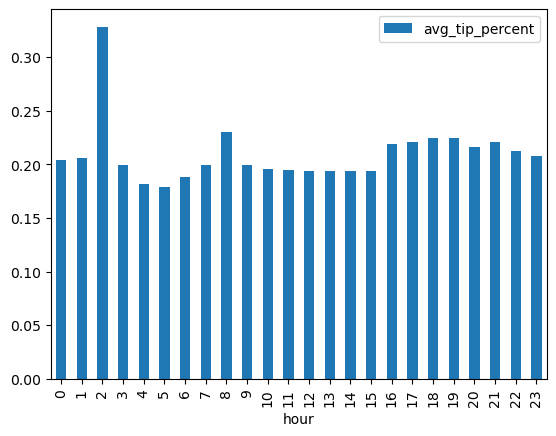

In [158]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df1['tip_percent'] = df1['tip_amount']/df1['fare_amount']
df1.groupby(by='trip_distance_range')['tip_percent'].mean().reset_index(name='avg_tip_percent').plot.bar(x='trip_distance_range', y='avg_tip_percent')

df1['tip_percent'] = df1['tip_amount']/df1['fare_amount']
df1.groupby(by='passenger_count')['tip_percent'].mean().reset_index(name='avg_tip_percent').plot.bar(x='passenger_count', y='avg_tip_percent')

df1['tip_percent'] = df1['tip_amount']/df1['fare_amount']
df1.groupby(by='hour')['tip_percent'].mean().reset_index(name='avg_tip_percent').plot.bar(x='hour', y='avg_tip_percent')

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [160]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
df1_lowtip = df1[df1['tip_percent'] < 0.1]
df1_hightip = df1[df1['tip_percent'] > 0.25]

#df1_lowtip.compare(df1_hightip)


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

<Axes: xlabel='day_of_week'>

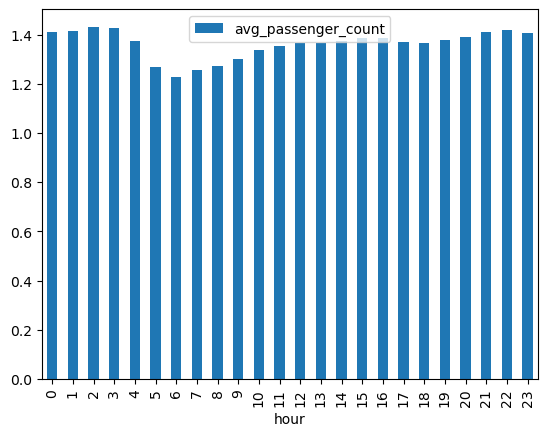

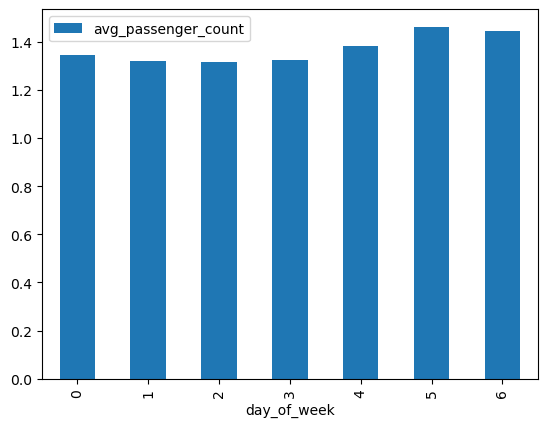

In [162]:
# See how passenger count varies across hours and days
df1.groupby(by='hour')['passenger_count'].mean().reset_index(name='avg_passenger_count').plot.bar(x='hour', y='avg_passenger_count')
df1.groupby(by='day_of_week')['passenger_count'].mean().reset_index(name='avg_passenger_count').plot.bar(x='day_of_week', y='avg_passenger_count')



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [164]:
# How does passenger count vary across zones

zones_temp = zones1.groupby(by='LocationID')['passenger_count'].mean().reset_index(name='avg_passenger_count')
zones['avg_passenger_count'] = zones['LocationID'].map(zones_temp.set_index('LocationID')['avg_passenger_count'])
zones['avg_passenger_count'].fillna(0, inplace=True)





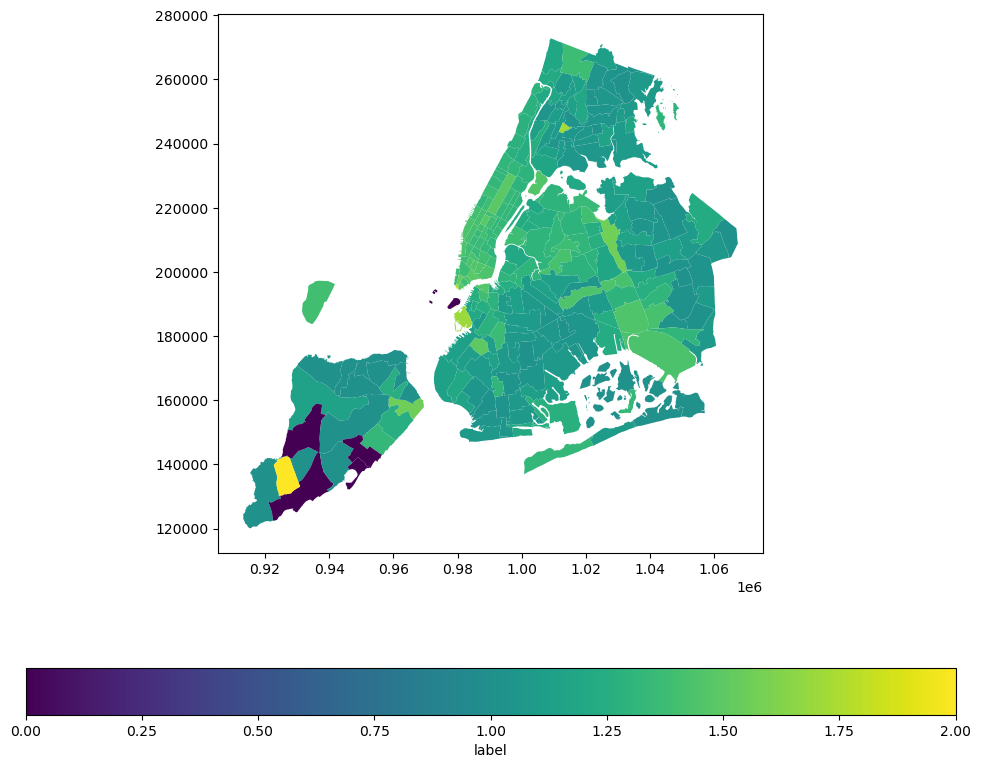

 LocationID                                          zone
         84             Eltingville/Annadale/Prince's Bay
         99                               Freshkills Park
        103 Governor's Island/Ellis Island/Liberty Island
        103 Governor's Island/Ellis Island/Liberty Island
        103 Governor's Island/Ellis Island/Liberty Island
        110                              Great Kills Park
        176                                       Oakwood


In [165]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column = 'avg_passenger_count',
    ax = ax,
    legend = True,
    legend_kwds = {'label': "label", 'orientation': "horizontal"})
plt.show()

print(zones[zones['avg_passenger_count']==0][['LocationID', 'zone']].to_string(index=False))



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [168]:
# How often is each surcharge applied?
top_pickup_surcharge_zones = zones1.groupby(by=['PULocationID'])['congestion_surcharge'].size().reset_index(name='count_congestion_surcharge').nlargest(10, 'count_congestion_surcharge')
top_pickup_surcharge_zones = top_pickup_surcharge_zones.merge(zones, how='inner', left_on='PULocationID', right_on='LocationID')
print('Top 10 pickup zones with high congestion surcharges are:')
print(top_pickup_surcharge_zones[['zone', 'count_congestion_surcharge']].to_string(index=False))

top_dropoff_surcharge_zones = zones1.groupby(by=['DOLocationID'])['congestion_surcharge'].size().reset_index(name='count_congestion_surcharge').nlargest(10, 'count_congestion_surcharge')
top_dropoff_surcharge_zones = top_dropoff_surcharge_zones.merge(zones, how='inner', left_on='DOLocationID', right_on='LocationID')
print('Top 10 dropoff zones with high congestion surcharges are')
print(top_dropoff_surcharge_zones[['zone', 'count_congestion_surcharge']].to_string(index=False))

top_pickup_surcharge_zones = zones1.groupby(by=['PULocationID'])['improvement_surcharge'].size().reset_index(name='count_improvement_surcharge').nlargest(10, 'count_improvement_surcharge')
top_pickup_surcharge_zones = top_pickup_surcharge_zones.merge(zones, how='inner', left_on='PULocationID', right_on='LocationID')
print('Top 10 pickup zones with high improvement surcharges are')
print(top_pickup_surcharge_zones[['zone', 'count_improvement_surcharge']].to_string(index=False))

top_dropoff_surcharge_zones = zones1.groupby(by=['DOLocationID'])['improvement_surcharge'].size().reset_index(name='count_improvement_surcharge').nlargest(10, 'count_improvement_surcharge')
top_dropoff_surcharge_zones = top_dropoff_surcharge_zones.merge(zones, how='inner', left_on='DOLocationID', right_on='LocationID')
print('Top 10 dropoff zones with high improvement surcharges are')
print(top_dropoff_surcharge_zones[['zone', 'count_improvement_surcharge']].to_string(index=False))


Top 10 pickup zones with high congestion surcharges are:
                        zone  count_congestion_surcharge
       Upper East Side South                      347538
              Midtown Center                      334204
       Upper East Side North                      310700
                Midtown East                      258192
Penn Station/Madison Sq West                      245603
         Lincoln Square East                      241629
   Times Sq/Theatre District                      231819
                 Murray Hill                      215037
               Midtown North                      209012
       Upper West Side South                      204042
Top 10 dropoff zones with high congestion surcharges are
                     zone  count_congestion_surcharge
    Upper East Side North                      323448
    Upper East Side South                      309224
           Midtown Center                      276876
              Murray Hill                  

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Taxis should be arranged to be dispatched to around below areas during peak hours (evenings), peak days (midweek).
      Upper East Side South 
              Midtown Center
       Upper East Side North
                Midtown East
Penn Station/Madison Sq West
         Lincoln Square East
   Times Sq/Theatre District
                 Murray Hill
               Midtown North
       Upper West Side South

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

The taxis should be positioned around the airports and the Manhattan area of New York.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

The surcharges can be increased during peak hours decreased in non-peak hours.